In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
visa_df=pd.read_csv(r'C:\Users\User\Downloads\Visadataset.csv')

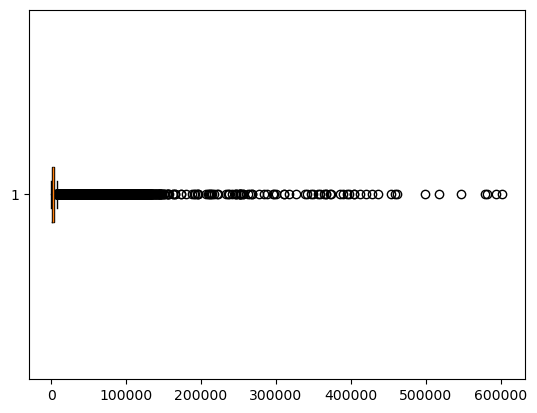

In [6]:
plt.boxplot(visa_df['no_of_employees'],vert=False)
plt.show()

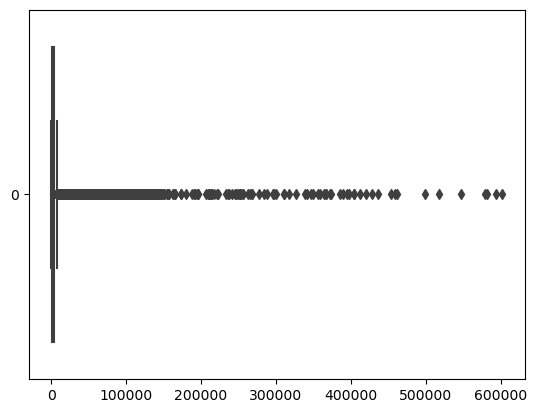

In [7]:
sns.boxplot(visa_df['no_of_employees'],orient='h')
plt.show()

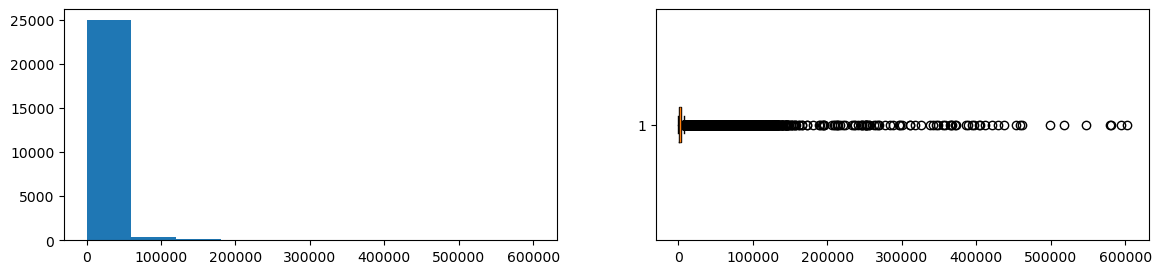

In [8]:
plt.figure(figsize=(14,3))
plt.subplot(1,2,1).hist(visa_df['no_of_employees'])
plt.subplot(1,2,2).boxplot(visa_df['no_of_employees'],vert=False)

plt.show()

**Outliers Data**

In [13]:
q1=np.quantile(visa_df['no_of_employees'],0.25)
q3=np.quantile(visa_df['no_of_employees'],0.75)
IQR=q3-q1
LB = q1-1.5*IQR
UB = q3+1.5*IQR
con1=visa_df['no_of_employees'] < LB
con2 =visa_df['no_of_employees'] > UB
outliers_data=visa_df[con1 | con2]
len(outliers_data)

1556

**Non Outliers**

In [14]:
q1=np.quantile(visa_df['no_of_employees'],0.25)
q3=np.quantile(visa_df['no_of_employees'],0.75)
IQR=q3-q1
LB = q1-1.5*IQR
UB = q3+1.5*IQR
con1=visa_df['no_of_employees'] > LB
con2 =visa_df['no_of_employees'] < UB
non_outliers_data=visa_df[con1 & con2]
len(non_outliers_data)

23924

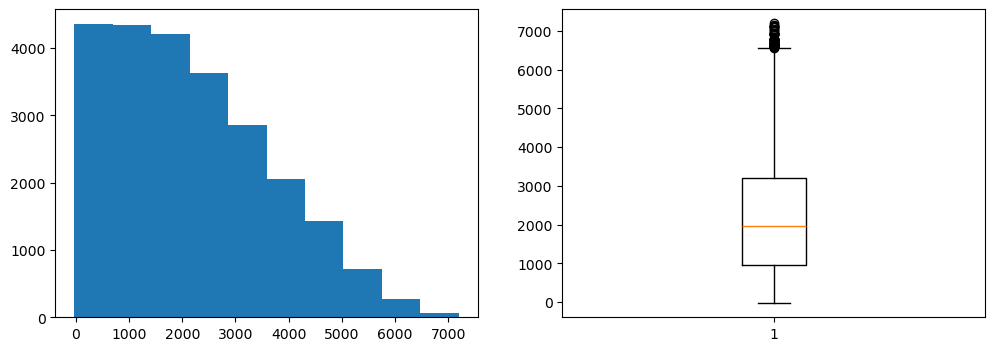

In [15]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1).hist(non_outliers_data['no_of_employees'])
plt.subplot(1,2,2).boxplot(non_outliers_data['no_of_employees'])
plt.show()

**Fill outliers with median**

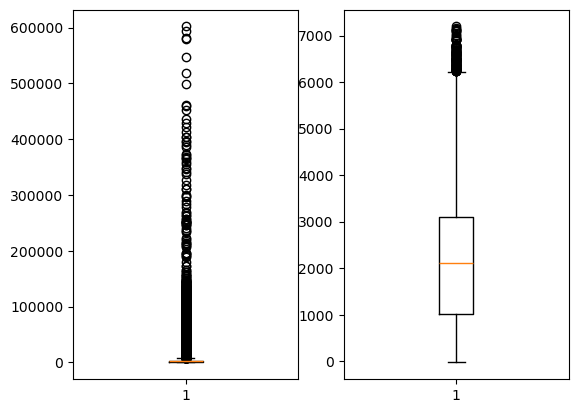

In [17]:
median_val = round(visa_df['no_of_employees'].median(),2)
wages=[]
for value in visa_df['no_of_employees'].values:
    if value < LB or value > UB:
        wages.append(median_val)
    else:
        wages.append(value)

visa_df_copy = visa_df.copy()
visa_df_copy['no_of_employees']=wages

plt.subplot(1,2,1).boxplot(visa_df['no_of_employees'])
plt.subplot(1,2,2).boxplot(visa_df_copy['no_of_employees'])
plt.show()

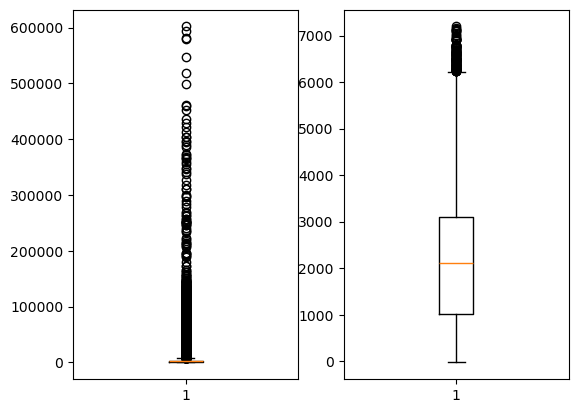

In [18]:
con1=visa_df['no_of_employees']<LB
con2=visa_df['no_of_employees']>UB
con=con1 | con2
median=visa_df['no_of_employees'].median()
new_data=np.where(con,median,visa_df['no_of_employees'])
visa_df_copy = visa_df.copy()
visa_df_copy['no_of_employees'] = new_data
plt.subplot(1,2,1).boxplot(visa_df['no_of_employees'])
plt.subplot(1,2,2).boxplot(visa_df_copy['no_of_employees'])
plt.show()